In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import copy
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import statsmodels.formula.api as smf
import statsmodels.api as sm
import re

In [7]:
root = r".\data upload\0510" # enter your data file path
file_name = r"main data.xlsx" # enter your file name
or_file_name = r"ologit results.xlsx"
df = pd.read_excel(os.path.join(root, file_name))

In [8]:
# Sample distribution by career stage, area and gender
area_order = ["Natural Science & Engineering", "Medical Sciences", "Social Sciences","Arts & Humanities","All areas"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career","All ranks"]
genders = ["Women","Men","Non-binary","All"]

dfx = df

table = pd.crosstab([dfx["area"],dfx["gender_new"]],dfx["rank"])
all_area = table.sum(level="gender_new")
all_area.index = [("All areas",x) for x in all_area.index]
table = pd.concat([table,all_area],axis=0)
all_car = table.sum(axis=1)
all_car.name = "All ranks"
table = pd.concat([table,all_car],axis=1)
all_gender = table.sum(level="area")
all_gender.index = [(x, "All") for x in all_gender.index]
table = pd.concat([table,all_gender],axis=0)
table = pd.DataFrame(table,
                     index = pd.MultiIndex.from_product([area_order,genders]),
                    columns = rank_order)
table

Trainee  Early Career  \
Natural Science & Engineering Women           180           220   
                              Men             188           178   
                              Non-binary        3             3   
                              All             371           401   
Medical Sciences              Women           195           417   
                              Men              80           178   
                              Non-binary        2             6   
                              All             277           601   
Social Sciences               Women            99           293   
                              Men              30           128   
                              Non-binary        1             2   
                              All             130           423   
Arts & Humanities             Women             7            59   
                              Men               7            23   
                              Non-binary        0             1   
                              All              14            83   
All areas                     Women           481           989   
                              Men             305           507   
                              Non-binary        6            12   
                              All             792          1508   

                                          Middle Career  Late Career  \
Natural Science & Engineering Women                 371          407   
                              Men                   420          631   
                              Non-binary              3            1   
                              All                   794         1039   
Medical Sciences              Women                 555          472   
                              Men                   273          426   
                              Non-binary              3            0   
                              All                   831          898   
Social Sciences               Women                 495          355   
                              Men                   206          341   
                              Non-binary              2            0   
                              All                   703          696   
Arts & Humanities             Women                 139          161   
                              Men                    72          130   
                              Non-binary              1            0   
                              All                   212          291   
All areas                     Women                1560         1395   
                              Men                   971         1528   
                              Non-binary              9            1   
                              All                  2540         2924   

                                          All ranks  
Natural Science & Engineering Women            1178  
                              Men              1417  
                              Non-binary         10  
                              All              2605  
Medical Sciences              Women            1639  
                              Men               957  
                              Non-binary         11  
                              All              2607  
Social Sciences               Women            1242  
                              Men               705  
                              Non-binary          5  
                              All              1952  
Arts & Humanities             Women             366  
                              Men               232  
                              Non-binary          2  
                              All               600  
All areas                     Women            4425  
                              Men              3311  
                              Non-binary         28  
                              All        

In [9]:
# sample respondents Rank/Role – Career Stage

area_order = ["Natural Science & Engineering", "Medical Sciences", "Social Sciences","Arts & Humanities","All areas"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career","All ranks"]
genders = ["Women","Men","Non-binary","All"]

table = pd.crosstab([df["rank"],df["role_new"]],df["gender_new"], margins=True)
table

gender_new                                                         Men  \
rank          role_new                                                   
Early Career  asi                                                  507   
Late Career   emeritus professor                                   312   
              full professor                                      1216   
Middle Career aso                                                  762   
              senior researcher (at a public or private insti...   209   
Trainee       post-doctoral fellow                                 184   
              research associate (at a public or private inst...   121   
All                                                               3311   

gender_new                                                        Non-binary  \
rank          role_new                                                         
Early Career  asi                                                         12   
Late Career   emeritus professor                                           0   
              full professor                                               1   
Middle Career aso                                                          7   
              senior researcher (at a public or private insti...           2   
Trainee       post-doctoral fellow                                         4   
              research associate (at a public or private inst...           2   
All                                                                       28   

gender_new                                                        Women   All  
rank          role_new                                                         
Early Career  asi                                                   989  1508  
Late Career   emeritus professor                                    179   491  
              full professor                                       1216  2433  
Middle Career aso                                                  1350  2119  
              senior researcher (at a public or private insti...    210   421  
Trainee       post-doctoral fellow                                  291   479  
              research associate (at a public or private inst...    190   313  
All                                                                4425  7764

In [10]:
# Sample respondents by Discipline- Disciplinary Area
df1 = df.copy()
df1["Ediscipline"].fillna("Manually categorized",inplace=True)

area_order = ["Natural Science & Engineering", "Medical Sciences", "Social Sciences","Arts & Humanities","All areas"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career","All ranks"]
genders = ["Women","Men","Non-binary","All"]

table = pd.crosstab(df1["Ediscipline"],df1["gender_new"], margins=True,dropna=True)
table

gender_new,Men,Non-binary,Women,All
Ediscipline,,,,
Arts,15,0,33,48
Biology,237,4,318,559
Biomedical Research,267,1,313,581
Chemistry,117,1,96,214
Clinical Medicine,529,2,964,1495
Earth and Space,254,3,220,477
Engineering and Technology,259,1,119,379
Health,58,3,278,339
Humanities,120,1,182,303


# career success

In [8]:
# subjective

'''
"I am satisfied with the progress I have made \ntowards meeting my research achievement goals.",
"I am satisfied with the progress I have made \ntowards meeting my career achievement goals.",
"I have been recognized for \nmy contributions to scholarly communities.",
Please rate your overall satisfaction with your current or most recent marriage or partnership.
'''

satis = ["res_ach","car_dev","contrib"]

res = pd.DataFrame()
for i in range(len(satis)):
    a = pd.crosstab([df["married_child"],df["gender_new"]],df[satis[i]]).drop(["Non-binary"], level="gender_new")
    total = a.sum(level=[0], axis=0)
    total.index = pd.MultiIndex.from_product([total.index, ["Total"]])
    a = pd.concat([a,total],axis=0).sort_index(level=0)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res = pd.concat([res,a],axis=1)

res2 = pd.DataFrame()
df1 = df[df["married_child"].isin([2,3])]
for i in range(len(satis)):
    a = pd.crosstab(df1["gender_new"],df1[satis[i]]).drop(["Non-binary"])
    total = a.sum(axis=0)
    total.name = "Total"
    a = a.append(total)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res2 = pd.concat([res2,a],axis=1)

res2.index = pd.MultiIndex.from_product([["All"], res2.index])
res = pd.concat([res,res2])

questions = ["Research satisfaction",
"Career satisfaction",
"Community recognition"]
options = ["Disagree","Neutral","Agree"]

table = res.drop([0,1],level="married_child")
table.columns = pd.MultiIndex.from_product([questions,options],names=["question","option"])
table = table.stack(level=["question","option"]).unstack(level=["married_child","gender_new"])

table

married_child                           2                                3  \
gender_new                            Men      Total      Women        Men   
question              option                                                 
Career satisfaction   Agree     81.395349  82.178884  82.650862  82.520000   
                      Disagree  14.669052  14.996638  15.193966  14.600000   
                      Neutral    3.935599   2.824479   2.155172   2.880000   
Community recognition Agree     82.678571  82.222222  81.945946  84.411410   
                      Disagree  11.250000  11.245791  11.243243   9.843311   
                      Neutral    6.071429   6.531987   6.810811   5.745279   
Research satisfaction Agree     77.619893  76.773762  76.262084  76.762821   
                      Disagree  19.182948  20.414993  21.160043  20.753205   
                      Neutral    3.197158   2.811245   2.577873   2.483974   

married_child                                               All             \
gender_new                          Total      Women        Men      Women   
question              option                                                 
Career satisfaction   Agree     80.096480  78.140136  82.314482  79.180124   
                      Disagree  16.758978  18.501776  14.612619  17.739130   
                      Neutral    3.144542   3.358088   3.072900   3.080745   
Community recognition Agree     80.874709  78.025890  84.093145  78.929016   
                      Disagree  12.708371  15.016181  10.101673  14.146949   
                      Neutral    6.416921   6.957929   5.805182   6.924035   
Research satisfaction Agree     72.077226  68.302130  76.920562  70.141474   
                      Disagree  25.116196  28.631375  20.464204  26.904939   
                      Neutral    2.806578   3.066495   2.615234   2.953586   

married_child                              
gender_new                          Total  
question              option               
Career satisfaction   Agree     80.533597  
                      Disagree  16.389046  
                      Neutral    3.077357  
Community recognition Agree     81.157984  
                      Disagree  12.400906  
                      Neutral    6.441110  
Research satisfaction Agree     73.067156  
                      Disagree  24.125282  
                      Neutral    2.807562

In [9]:
df2 = df[df["gender_new"]!="Non-binary"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career","All ranks"]
hue_order_set = ["Women", "Men","Total"]
questions =  ["rel_npap", "rel_cite","uni_cola"]
aggfunc = [np.mean, np.median, min, max, np.std]

pre = df2[df2["married_child"].isin([2,3]) & ~df2["rel_npap"].isnull()]
table = pd.pivot_table(pre,
                        values = questions,
                        index = [ "rank", "gender_new"],
                        columns = "married_child",
                        aggfunc=aggfunc )

all_married = pd.pivot_table(pre,
                        values = questions,
                        index = [ "rank", "gender_new"],
                        aggfunc=aggfunc )
all_married.columns = pd.MultiIndex.from_tuples([(x,y,"All") for x,y in all_married.columns])
table = pd.concat([table,all_married],axis=1)

# mix all ranks
all_rank = pd.pivot_table(pre,
                          values = questions,
                          index = [ "gender_new"],
                          columns = "married_child",
                          aggfunc=aggfunc )
all_rank.index = pd.MultiIndex.from_product([["All ranks"], all_rank.index])

all_rank_married = pd.pivot_table(pre,
                        values = questions,
                        index = ["gender_new"],
                        aggfunc=aggfunc )
all_rank_married.columns = pd.MultiIndex.from_tuples([(x,y,"All") for x,y in all_rank_married.columns])
all_rank_married.index = pd.MultiIndex.from_tuples([("All ranks", x) for x in all_rank_married.index])
all_rank = pd.concat([all_rank,all_rank_married],axis=1)

# mix genders
total = pd.pivot_table(pre,
                          values = questions,
                          index = [ "rank"],
                          columns = "married_child",
                          aggfunc=aggfunc )
total.index = pd.MultiIndex.from_product([total.index, ["Total"]])

all_gender_married = pd.pivot_table(pre,
                        values = questions,
                        index = ["rank"],
                        aggfunc=aggfunc)
all_gender_married.columns = pd.MultiIndex.from_tuples([(x,y,"All") for x,y in all_gender_married.columns])
all_gender_married.index = pd.MultiIndex.from_tuples([(x, "Total") for x in all_gender_married.index])
total = pd.concat([total,all_gender_married],axis=1)

# mix genders and ranks
all_total = pd.pivot_table(pre,
                   values = questions,
                   columns = "married_child",
                   aggfunc=aggfunc ).stack(level=[0,1])

all_total_married = pre[questions].apply(func=aggfunc ).stack()
all_total_married.index = pd.MultiIndex.from_tuples([(y,x,"All") for x,y in all_total_married.index])
all_total = pd.concat([all_total,all_total_married]).swaplevel(1, 2)
all_total.name = ("All ranks", "Total")
#print(all_total)

table = pd.concat([table,all_rank,total]).swaplevel(0, 1,axis=1).swaplevel(1, 2,axis=1)
table = table.append(all_total)
table = pd.DataFrame(table,
                     index = pd.MultiIndex.from_product([rank_order,hue_order_set]),
                    columns = pd.MultiIndex.from_product([questions,[2,3,"All"],["mean","median","min","max","std"]]))
table.to_excel(r"distribution.xlsx")

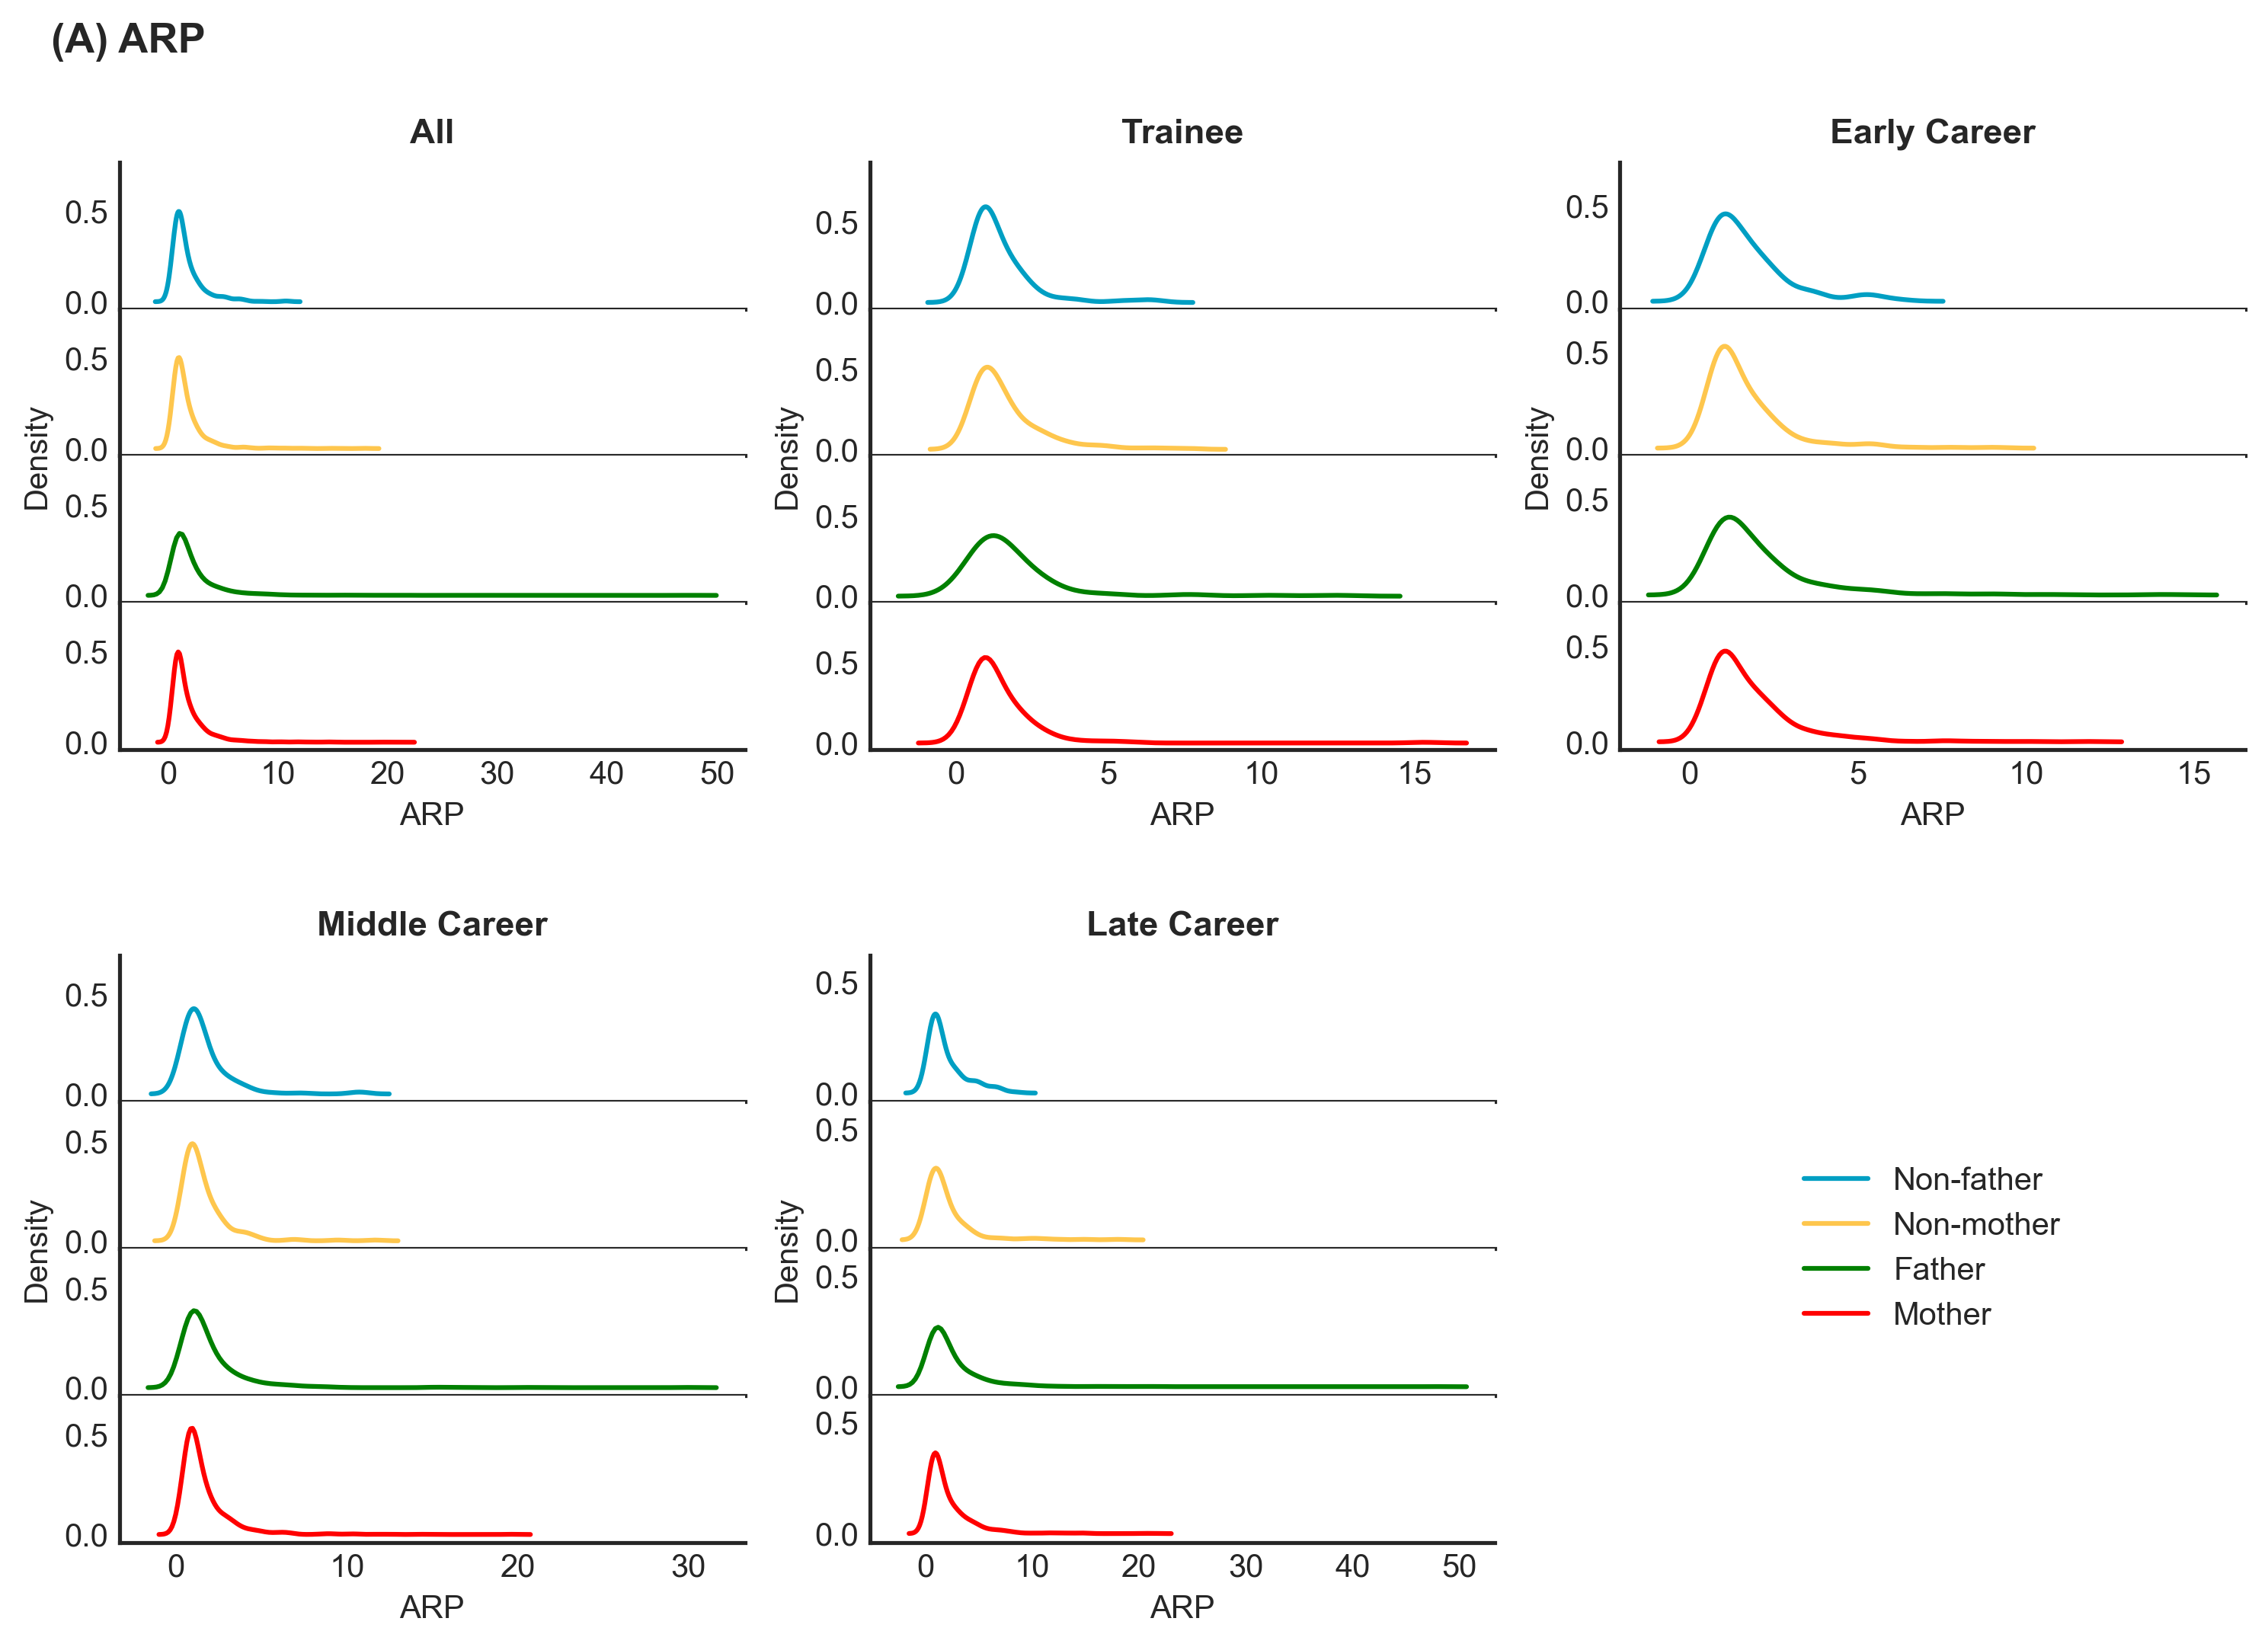

In [58]:
def gen_multi_gs(figsize=(8,8), nrow=4, wspace=0.01, hspace=0.5, width_ratios=[1,1,0.5],height_ratios=[1,0.9]):
    fig = plt.figure(constrained_layout=True, figsize=figsize,dpi=300)
    gs0 = GridSpec(2, 3, wspace=wspace, hspace=hspace, width_ratios=width_ratios, height_ratios=height_ratios)
    gs00 = GridSpecFromSubplotSpec(nrow, 1, subplot_spec=gs0[0,0],wspace=0,hspace=0)
    gs01 = GridSpecFromSubplotSpec(nrow, 1, subplot_spec=gs0[0,1],wspace=0,hspace=0)
    gs02 = GridSpecFromSubplotSpec(nrow, 1, subplot_spec=gs0[0,2],wspace=0,hspace=0)
    gs10 = GridSpecFromSubplotSpec(nrow, 1, subplot_spec=gs0[1,0],wspace=0,hspace=0)
    gs11 = GridSpecFromSubplotSpec(nrow, 1, subplot_spec=gs0[1,1],wspace=0,hspace=0)
    gs12 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[1,2],wspace=0,hspace=0)
    
    axes_set = []
    for gs in [gs00, gs01, gs02]:
        a0 = plt.subplot(gs[0,0])
        a1 = plt.subplot(gs[1,0], sharex = a0, sharey = a0)
        a2 = plt.subplot(gs[2,0], sharex = a0, sharey = a0)
        a3 = plt.subplot(gs[3,0], sharex = a0, sharey = a0)
        axes_set.append([a0, a1, a2, a3])
    for gs in [gs10, gs11]:
        a0 = plt.subplot(gs[0,0])
        a1 = plt.subplot(gs[1,0], sharex = a0, sharey = a0)
        a2 = plt.subplot(gs[2,0], sharex = a0, sharey = a0)
        a3 = plt.subplot(gs[3,0], sharex = a0, sharey = a0)
        axes_set.append([a0, a1, a2, a3])
    axes_set.append([plt.subplot(gs12[0,0])])
    return fig, gs0, axes_set

def obj_dist(df2, metric, caption):
    # "rel_npap":"Annual relative publication"
    # "rel_cite": "Average relative citation"
    # "uni_cola": "Annual relative coauthor"
    metric_map = {"rel_npap":"ARP",
                  "rel_cite": "ARC",
                 "uni_cola": "ARCo"}
    legends = [["Non-father","Non-mother"],["Father","Mother"]]
    pre = df2[df2["married_child"].isin([2,3]) & ~df2[metric].isnull()]
    pre.rename({"gender_new":"Gender", metric: metric_map[metric]},axis=1,inplace=True)
    hue_order_set = ["Men", "Women"]
    rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career"]
    married_child = ["Non-parent","Parent"]
    colors = {2:["#009FC3","#FEC64D"], 3:["green","red"]}# male, female
    plt.style.use("seaborn-white")

    fig, gs0, axes_set = gen_multi_gs(figsize=(12,8), nrow=4, wspace=0.2, hspace=0.35, width_ratios=[1,1,1],height_ratios=[1,1])
    patches = []

    for m, m_label in enumerate([2,3]):
        for g, g_label in enumerate(hue_order_set):
            ax1 = axes_set[0][m * 2 + g]
            sns.kdeplot(x =metric_map[metric], color = colors[m_label][g], 
                          data = pre[(pre["married_child"]==m_label) & (pre["Gender"]==g_label)],
                        ax=ax1, fill=False, legend=False, common_norm=True) #, errwidth = 0.8, capsize=0.1
            ax1.set_xlabel(None)
            ax1.set_ylabel(None)
            if m * 2 + g == 3:
                ax1.set_xlabel(metric_map[metric],y=1)
                ax1.set_ylabel("Density",x=0.08, y=2)
            y_bot, y_top = ax1.get_ylim()
            ax1.set_ylim([y_bot-0.01, y_top+0.062])
            if m * 2 + g == 0:
                ax1.set_title("All",fontsize=11, fontweight="bold")
            sns.despine(ax=ax1, top=True, right=True)
            
            for j in range(len(rank_order)):
                ax1 = axes_set[j+1][m * 2 + g]
                sns.kdeplot(x =metric_map[metric], color = colors[m_label][g], 
                              data = pre[(pre["rank"] == rank_order[j]) & (pre["married_child"]==m_label) & (pre["Gender"]==g_label)],
                            ax=ax1, fill=False, legend=False, common_norm=True) #, errwidth = 0.8, capsize=0.1

                ax1.set_xlabel(None)
                ax1.set_ylabel(None)
                if m * 2 + g == 3:
                    ax1.set_xlabel(metric_map[metric],y=1)
                    ax1.set_ylabel("Density",x=0.08, y=2)
                y_bot, y_top = ax1.get_ylim()
                ax1.set_ylim([y_bot-0.01, y_top+0.062])
                if m * 2 + g == 0:
                    ax1.set_title(rank_order[j],fontsize=11, fontweight="bold")
                sns.despine(ax=ax1, top=True, right=True)
            

    #legend
    for m, label1 in enumerate(married_child):
        for g, label2 in enumerate(hue_order_set):
                patch = Line2D([0], [0], color=colors[m+2][g], label=legends[m][g])
                patches.append(patch)
    axes_set[-1][0].legend(handles=patches, loc="center")
    axes_set[-1][0].axis('off')
    
    fig.text(x=0.1, y=0.94, s=caption,fontsize=13, fontweight="bold")
    plt.subplots_adjust(hspace = 0.1, wspace = 0.1)
    plt.savefig(caption+r".pdf", dpi=300)
    
obj_dist(df2, "rel_npap", "(A) ARP")

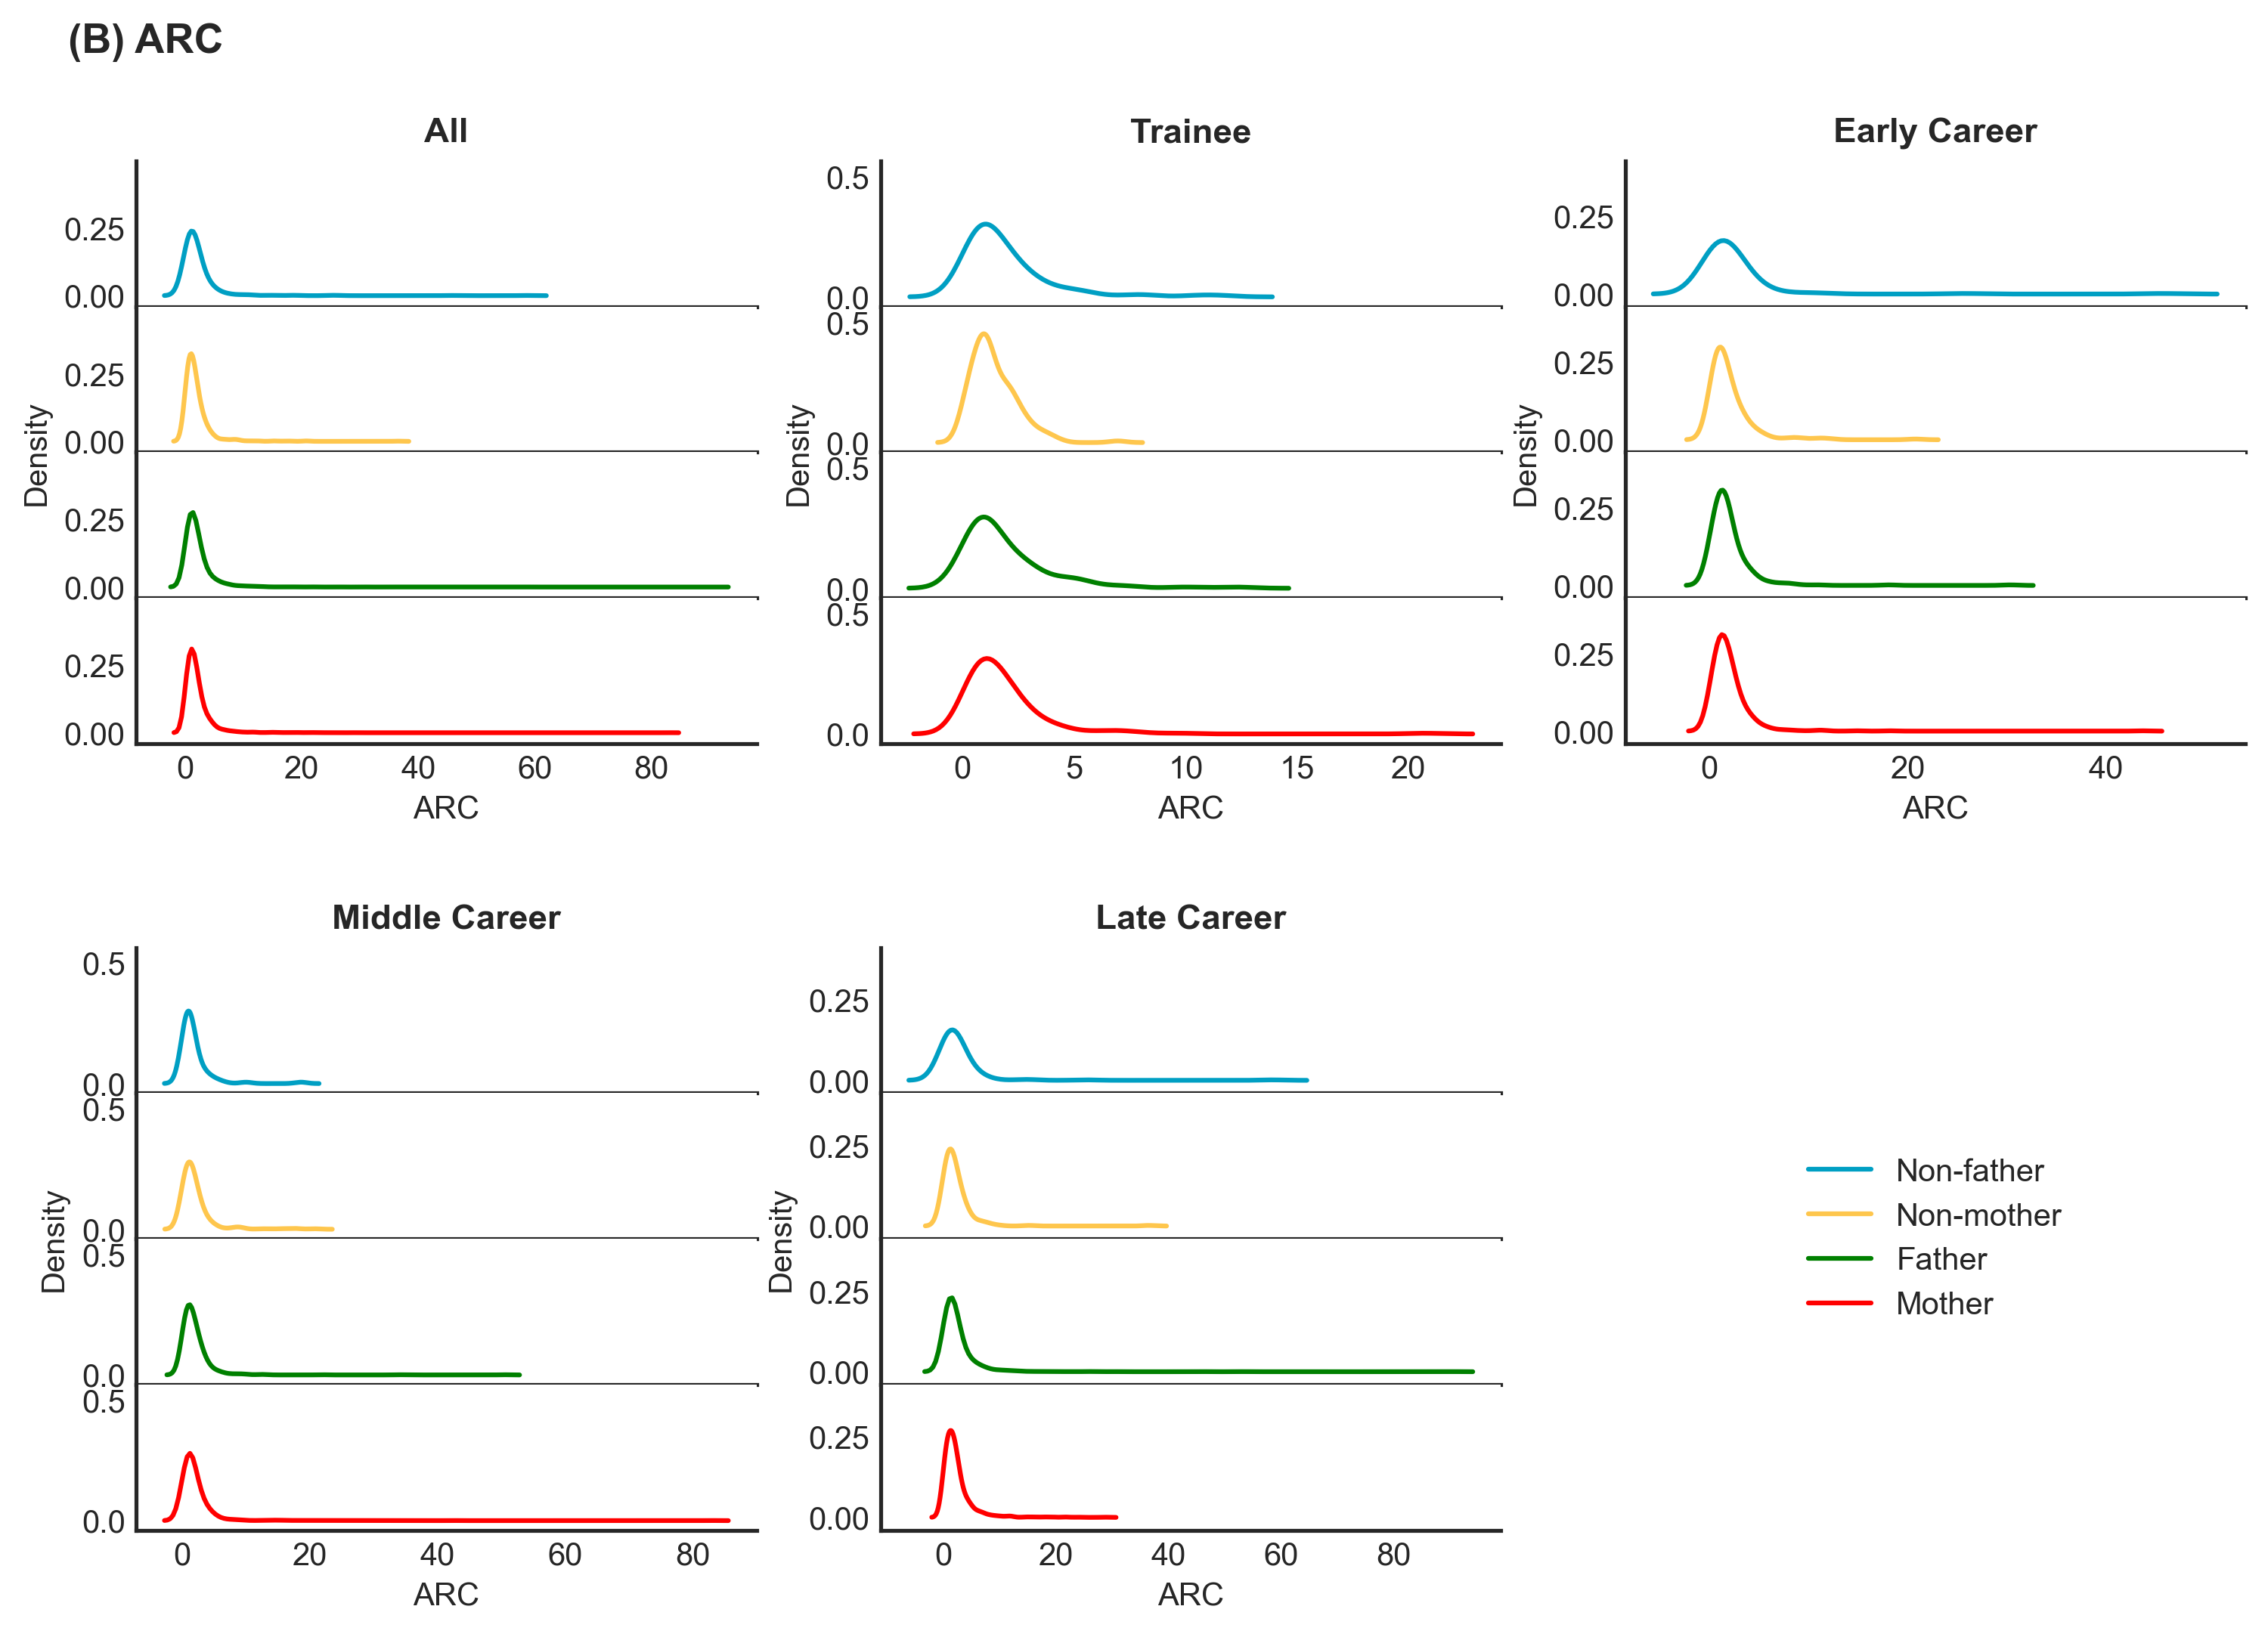

In [54]:
obj_dist(df2, "rel_cite","(B) ARC")

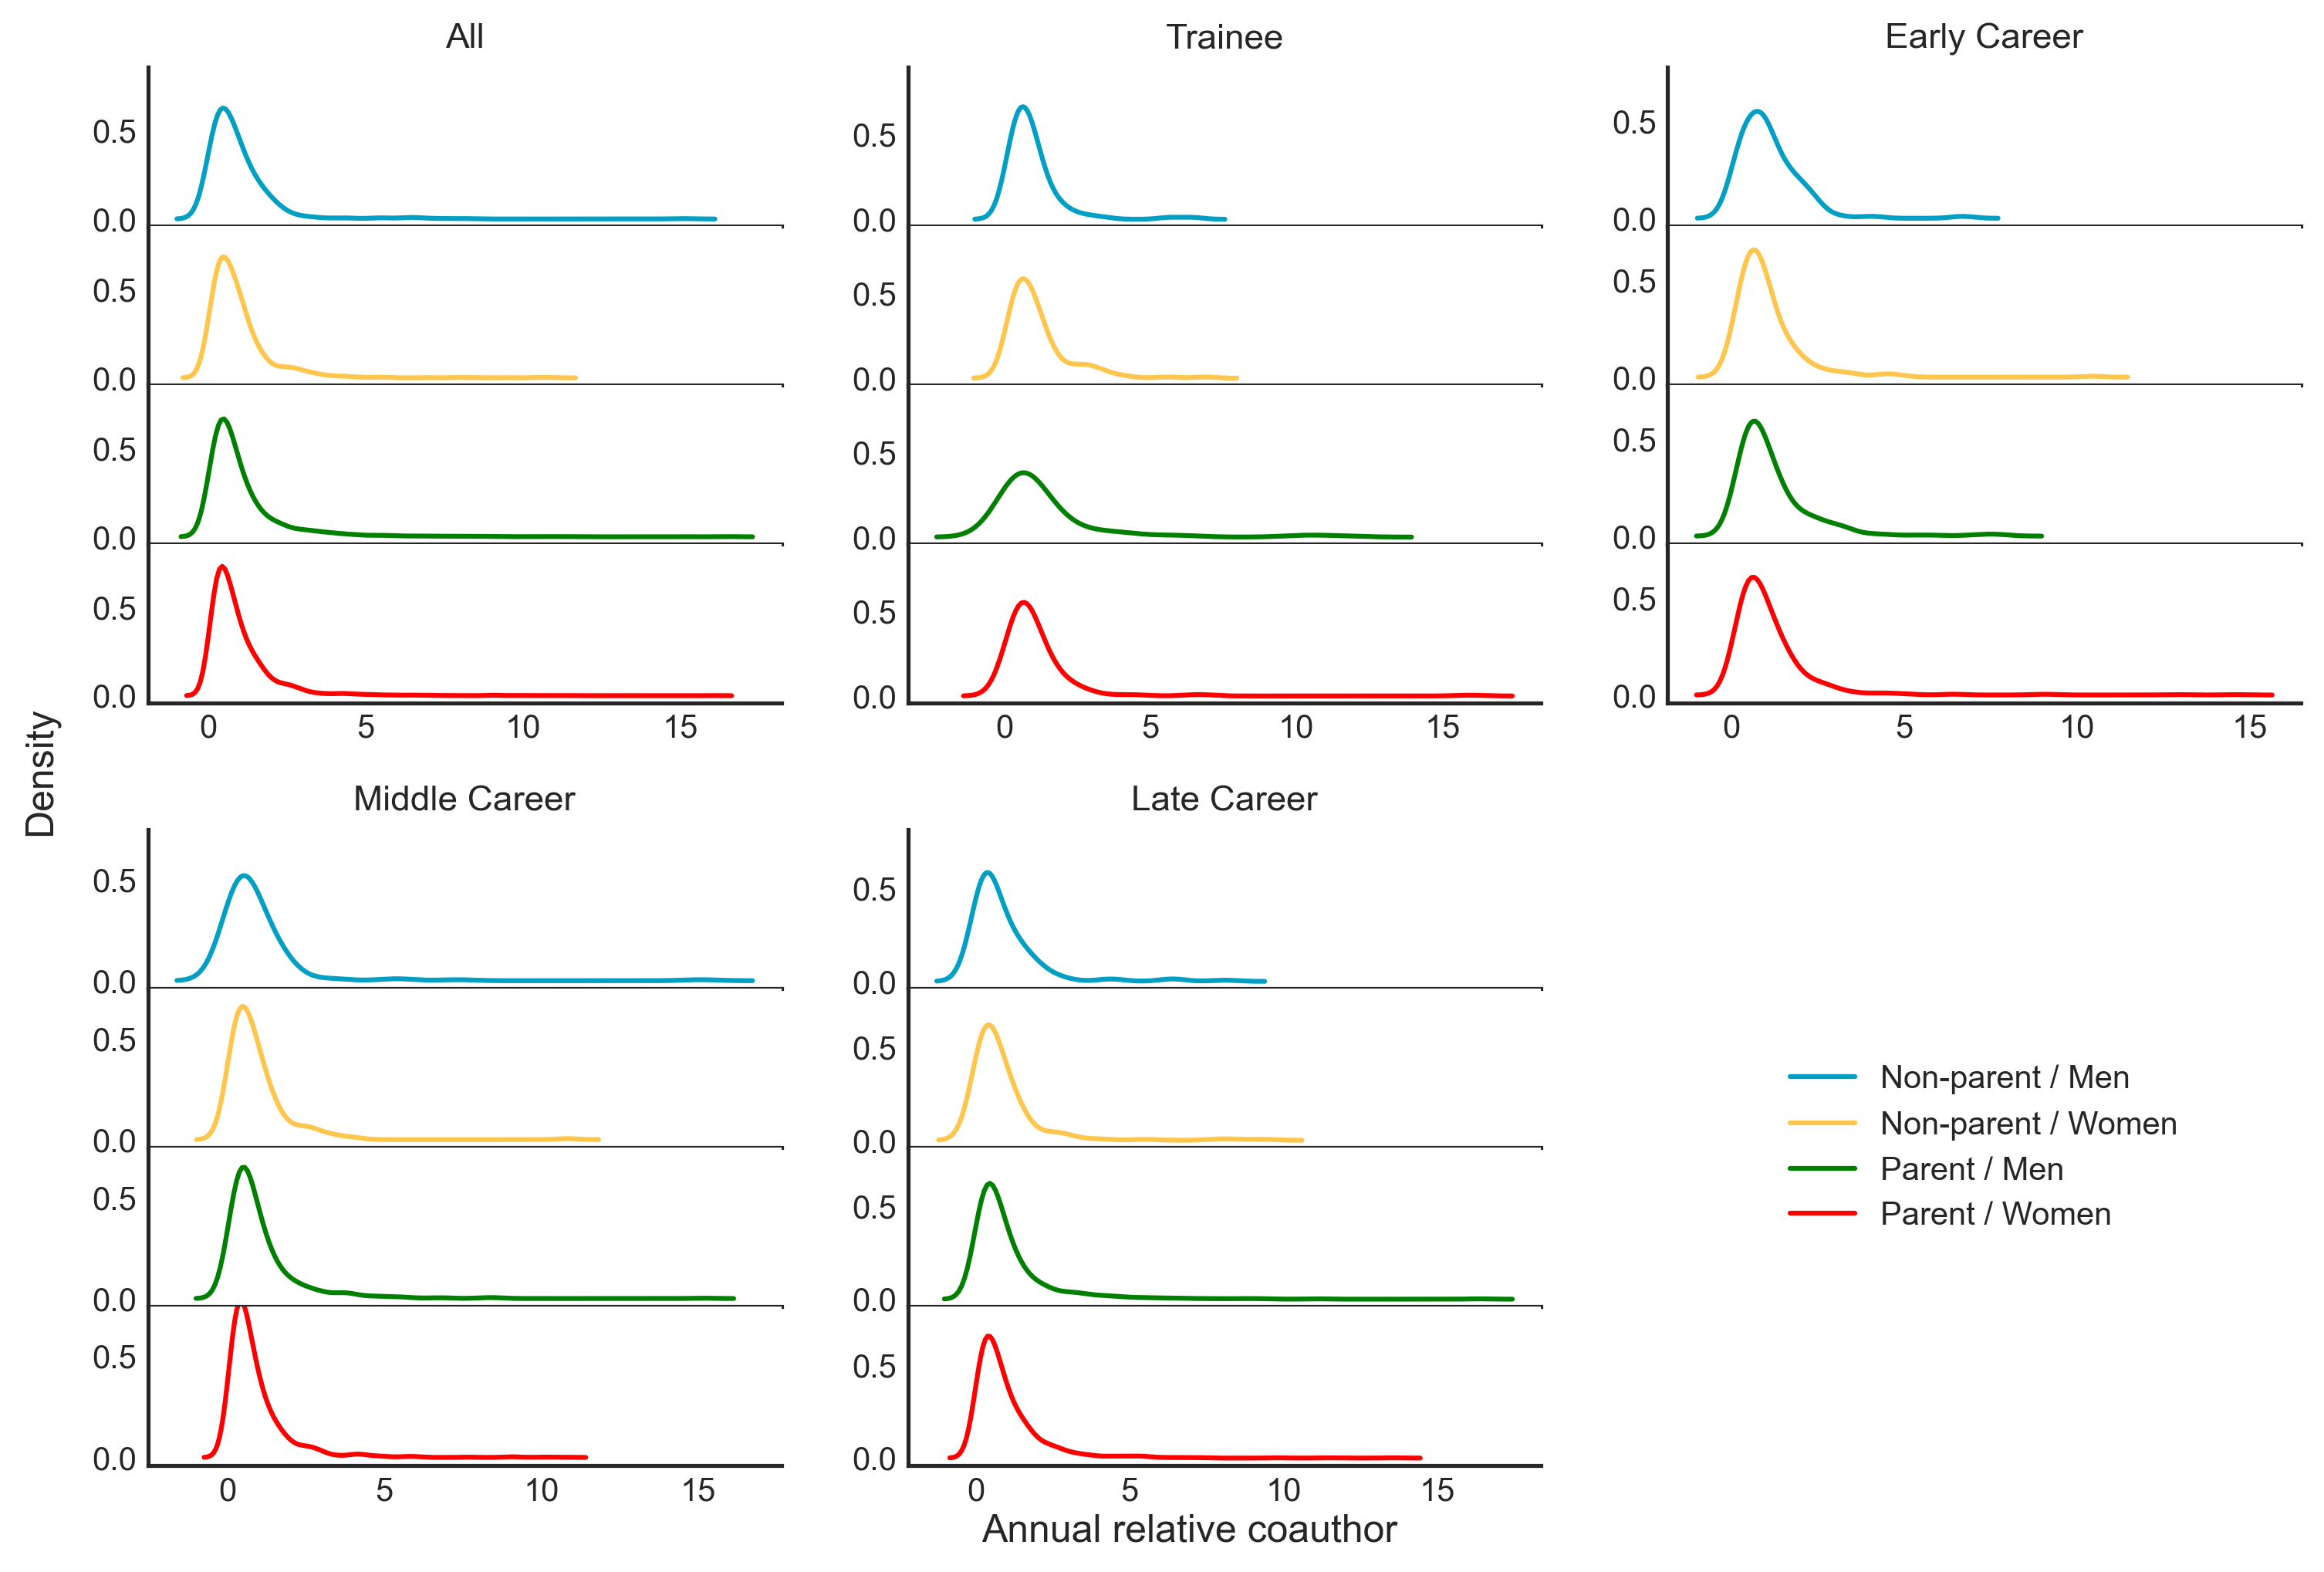

In [61]:
obj_dist(df2, "uni_cola")